Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Section 10.7.1 

Permutation test for a synthetic dataset comparing burger prices in Madrid and New York\
Topics: [Permutation test, nonparametric testing](https://www.youtube.com/watch?v=frSkAi36qd0)

Author: Carlos Fernandez-Granda

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
# matplotlib.rcParams['text.usetex'] = True
from itertools import permutations

font_size = 15
font_size_legend = 15
font_size_ticks = 15

prices = [12,13,16,18] # Burger prices, 12 and 13 correspond to Madrid, 16 and 18 correspond to New York

In [5]:
perms = list(permutations(prices)) # We have the luxury of using all permutations, as there are only 4 data points

mean_vals = np.zeros(len(perms))
for ind,perm in enumerate(perms):
    mean_vals[ind] = np.mean(perm[:2]) - np.mean(perm[2:])

observed = np.mean([16,18])- np.mean([12,13]) # mean(New York) - mean(Madrid)
p_value = prob[vals >= observed][0]
print("p value",round(p_value,3))

p value 0.167


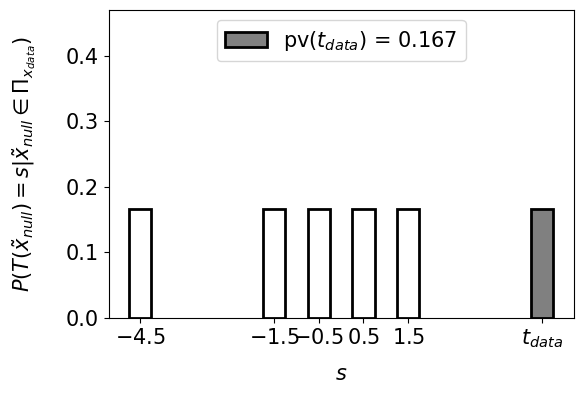

In [6]:
vals, counts = np.unique(mean_vals, return_counts=True)
prob = counts/len(mean_vals)
ymax = 0.47
xmin = -5.2
xmax = 5.2

plt.figure(figsize=(6,4))
plt.bar(vals[vals < observed],prob[vals < observed], width = 0.5, color = "white", edgecolor="black",linewidth = 2)
plt.bar(vals[vals >= observed],prob[vals >= observed], width = 0.5, color = "gray", edgecolor="black",
        linewidth = 2, label = r"pv$(t_{data})$ = " + str(np.round(p_value,3)))
plt.xticks(vals,[r'$-4.5$',r'$-1.5$',r'$-0.5$',r'$0.5$',r'$1.5$',r'$t_{data}$'],fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel(r"$P(T(\tilde{x}_{null}) = s| \tilde{x}_{null} \in \Pi_{x_{data}})$",fontsize=font_size_ticks,labelpad = 20)
plt.xlabel(r'$s$',labelpad = 10,fontsize=font_size)
plt.legend(fontsize=font_size,loc="upper center");

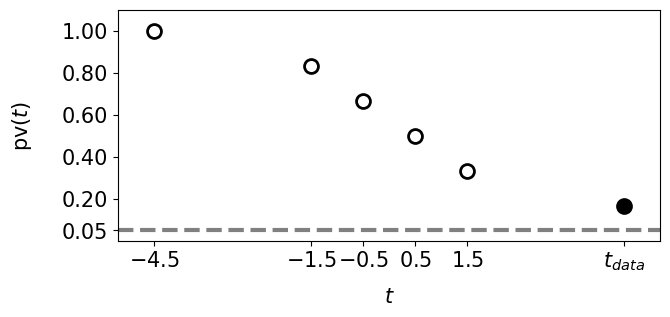

In [7]:
cumsum_prob = np.cumsum(prob[::-1])[::-1] 

plt.figure(figsize=(7,3))
plt.plot(vals,cumsum_prob, "o",markersize=10,markerfacecolor='white',markeredgecolor="black",
         markeredgewidth=2)
plt.plot(vals[-1],p_value, "o",markersize=10,markerfacecolor='black',markeredgecolor="black",
         label=r"pv$(t_{data})$ = $0.15$")
plt.hlines(0.05,xmin,xmax,lw=3,ls="dashed",label="Significance threshold",color="gray")
plt.xticks(vals,[r'$-4.5$',r'$-1.5$',r'$-0.5$',r'$0.5$',r'$1.5$',r'$t_{data}$'],fontsize=font_size_ticks) 
plt.yticks([0.05,0.2,0.4,0.6,0.8,1],fontsize=font_size_ticks)
plt.xlim([xmin,xmax])
plt.ylim([0,1.1])
plt.ylabel(r"pv($t$)",fontsize=font_size,labelpad = 20)
plt.xlabel(r'$t$',labelpad =10,fontsize=font_size);